In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

In [2]:
np.set_printoptions(suppress=True)
 
TitanicSurvivalDataNumeric=pd.read_pickle('TitanicSurvivalDataNumeric.pkl')
TitanicSurvivalDataNumeric
#TitanicSurvivalDataNumeric.info

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,0,0,1
887,1,1,0,19.0,0,0,30.0000,0,0,1
888,0,3,0,22.5,1,2,23.4500,0,0,1
889,1,1,1,26.0,0,0,30.0000,1,0,0


In [14]:

# chia bien muc tieu va bien du doan
TargetVariable=['Survived']
Predictors=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
            'Embarked_C', 'Embarked_Q', 'Embarked_S']

X=TitanicSurvivalDataNumeric[Predictors].values
y=TitanicSurvivalDataNumeric[TargetVariable].values
PredictorScalerFit=PredictorScaler.fit(X)

### chuan hoa du lieu ###
# khong chuan hoa bien muc tieu de phan loai
from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()
# tao cac gia tri tieu chuan cho x va y
X=PredictorScaler.fit_transform(X)

# chia tap  du lieu thanh 2 phan trainning va testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# in ra de kiem tra
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(623, 9)
(623, 1)
(268, 9)
(268, 1)


In [4]:
#dinh nghia ham Dense
Dense = tf.keras.layers.Dense
classifier = tf.keras.models.Sequential()
#xac dinh lop dau vao va lop an dau tien deu giong nhau
# relu (Rectifier linear unit function) chuac nang don vi tuyen tinh chinh luu
classifier.add(Dense(units=10, input_dim=9, kernel_initializer='uniform', activation='relu'))
 
#dinh nghia lop an thu 2
classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))
 
#dinh nghia lop dau ra
# sigmoid co nghia la ham activation = sigmoid
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
 
# Optimizer== thuat toan SGG tiep tuc cap nhat trong so
# loss== ham mat mat de do do chinh xac
# metrics== so sanh do chinh xac sau moi buoc cua SGD
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
 
# lap du lieu Neural Network vao du lieu cua training
survivalANN_Model=classifier.fit(X_train,y_train, batch_size=10 , epochs=10, verbose=1)

Epoch 1/10
63/63 [==============================] - 1s 681us/step - loss: 0.6896 - accuracy: 0.6212
Epoch 2/10
63/63 [==============================] - 0s 680us/step - loss: 0.6651 - accuracy: 0.6292
Epoch 3/10
63/63 [==============================] - 0s 700us/step - loss: 0.5891 - accuracy: 0.6453
Epoch 4/10
63/63 [==============================] - 0s 752us/step - loss: 0.5374 - accuracy: 0.7640
Epoch 5/10
63/63 [==============================] - 0s 735us/step - loss: 0.5132 - accuracy: 0.8090
Epoch 6/10
63/63 [==============================] - 0s 728us/step - loss: 0.4953 - accuracy: 0.8186
Epoch 7/10
63/63 [==============================] - 0s 735us/step - loss: 0.4803 - accuracy: 0.8170
Epoch 8/10
63/63 [==============================] - 0s 691us/step - loss: 0.4684 - accuracy: 0.8074
Epoch 9/10
63/63 [==============================] - 0s 679us/step - loss: 0.4601 - accuracy: 0.8074
Epoch 10/10
63/63 [==============================] - 0s 708us/step - loss: 0.4547 - accuracy: 0.8122

In [5]:
# dinh nghia ham de xac dinh sieu tham so tot nhat
def FunctionFindBestParams(X_train, y_train):
    
    # xac dinh cac sieu tham so de thu
    TrialNumber=0
    batch_size_list=[5, 10, 15, 20]
    epoch_list=[5, 10, 50 ,100]
    
    import pandas as pd
    SearchResultsData=pd.DataFrame(columns=['TrialNumber', 'Parameters', 'Accuracy'])
    
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            TrialNumber+=1
            
            # tao mot mo hinh ANN Classifier
            classifier = tf.keras.models.Sequential()
            classifier.add(Dense(units=10, input_dim=9, kernel_initializer='uniform', activation='relu'))
            classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))
            classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
            classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

            
            survivalANN_Model=classifier.fit(X_train,y_train, batch_size=batch_size_trial , epochs=epochs_trial, verbose=0)
            # lap do chinh xac vao training
            Accuracy = survivalANN_Model.history['accuracy'][-1]
            
            # in ket qua cua lan lap hien tai
            print(TrialNumber, 'Parameters:','batch_size:', batch_size_trial,'-', 'epochs:',epochs_trial, 'Accuracy:', Accuracy)
            
            SearchResultsData=pd.concat([SearchResultsData,pd.DataFrame(data=[[TrialNumber,
                            'batch_size'+str(batch_size_trial)+'-'+'epoch'+str(epochs_trial), Accuracy]],
                                                                    columns=['TrialNumber', 'Parameters', 'Accuracy'] )])
    return(SearchResultsData)

###############################################

# goi ham ket qua
ResultsData=FunctionFindBestParams(X_train, y_train)

1 Parameters: batch_size: 5 - epochs: 5 Accuracy: 0.8009631037712097
2 Parameters: batch_size: 5 - epochs: 10 Accuracy: 0.8138041496276855
3 Parameters: batch_size: 5 - epochs: 50 Accuracy: 0.8346709609031677
4 Parameters: batch_size: 5 - epochs: 100 Accuracy: 0.8346709609031677
5 Parameters: batch_size: 10 - epochs: 5 Accuracy: 0.8186196088790894
6 Parameters: batch_size: 10 - epochs: 10 Accuracy: 0.8105939030647278
7 Parameters: batch_size: 10 - epochs: 50 Accuracy: 0.8202247023582458
8 Parameters: batch_size: 10 - epochs: 100 Accuracy: 0.8459069132804871
9 Parameters: batch_size: 15 - epochs: 5 Accuracy: 0.7961476445198059
10 Parameters: batch_size: 15 - epochs: 10 Accuracy: 0.8105939030647278
11 Parameters: batch_size: 15 - epochs: 50 Accuracy: 0.8394863605499268
12 Parameters: batch_size: 15 - epochs: 100 Accuracy: 0.8459069132804871
13 Parameters: batch_size: 20 - epochs: 5 Accuracy: 0.7319422364234924
14 Parameters: batch_size: 20 - epochs: 10 Accuracy: 0.8138041496276855
15 Par

  TrialNumber             Parameters  Accuracy
0           8  batch_size10-epoch100  0.845907


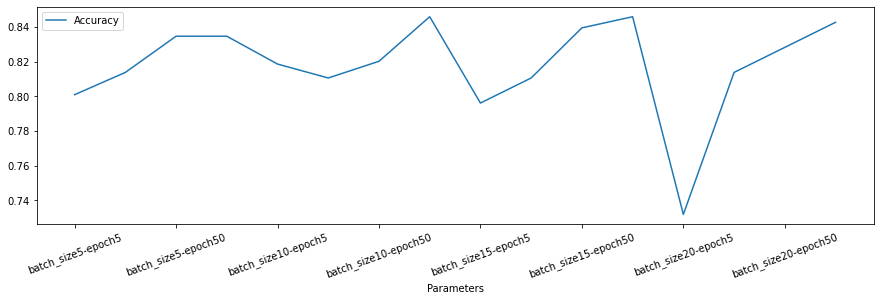

In [6]:
# in ra parameter tot nhat
print(ResultsData.sort_values(by='Accuracy', ascending=False).head(1))

# truc quan hoa ket qua
%matplotlib inline
ResultsData.plot(x='Parameters', y='Accuracy', figsize=(15,4), kind='line', rot=20)
import matplotlib

In [7]:
# Training mo hinh voi hyperparamters tot nhat
classifier.fit(X_train,y_train, batch_size=5 , epochs=100, verbose=1)


Epoch 1/100
125/125 [==============================] - 0s 684us/step - loss: 0.4499 - accuracy: 0.8122
Epoch 2/100
125/125 [==============================] - 0s 675us/step - loss: 0.4431 - accuracy: 0.8090
Epoch 3/100
125/125 [==============================] - 0s 678us/step - loss: 0.4385 - accuracy: 0.8138
Epoch 4/100
125/125 [==============================] - 0s 682us/step - loss: 0.4355 - accuracy: 0.8186
Epoch 5/100
125/125 [==============================] - 0s 700us/step - loss: 0.4322 - accuracy: 0.8154
Epoch 6/100
125/125 [==============================] - 0s 683us/step - loss: 0.4303 - accuracy: 0.8090
Epoch 7/100
125/125 [==============================] - 0s 670us/step - loss: 0.4271 - accuracy: 0.8154
Epoch 8/100
125/125 [==============================] - 0s 683us/step - loss: 0.4249 - accuracy: 0.8138
Epoch 9/100
125/125 [==============================] - 0s 669us/step - loss: 0.4247 - accuracy: 0.8170
Epoch 10/100
125/125 [==============================] - 0s 692us/step - l

125/125 [==============================] - 0s 695us/step - loss: 0.3871 - accuracy: 0.8507
Epoch 80/100
125/125 [==============================] - 0s 674us/step - loss: 0.3870 - accuracy: 0.8491
Epoch 81/100
125/125 [==============================] - 0s 669us/step - loss: 0.3876 - accuracy: 0.8459
Epoch 82/100
125/125 [==============================] - 0s 669us/step - loss: 0.3875 - accuracy: 0.8523
Epoch 83/100
125/125 [==============================] - 0s 704us/step - loss: 0.3865 - accuracy: 0.8459
Epoch 84/100
125/125 [==============================] - 0s 718us/step - loss: 0.3857 - accuracy: 0.8507
Epoch 85/100
125/125 [==============================] - 0s 698us/step - loss: 0.3855 - accuracy: 0.8491
Epoch 86/100
125/125 [==============================] - 0s 694us/step - loss: 0.3847 - accuracy: 0.8539
Epoch 87/100
125/125 [==============================] - 0s 673us/step - loss: 0.3849 - accuracy: 0.8491
Epoch 88/100
125/125 [==============================] - 0s 714us/step - loss:

In [15]:

# du doan tren testing data
Predictions=classifier.predict(X_test)
 
# dua du lieu thu nghiem tro lai ban dau
Test_Data=PredictorScalerFit.inverse_transform(X_test)
 
# tao data frame de phan tich du lieu test
TestingData=pd.DataFrame(data=Test_Data, columns=Predictors)
TestingData['Survival']=y_test
TestingData['PredictedSurvivalProb']=Predictions
 
# xac dinh nguong xac suat
def probThreshold(inpProb):
    if inpProb > 0.5:
        return(1)
    else:
        return(0)
 
# tao du doan bang cach ap dung nguoc xac suat
TestingData['PredictedSurvival']=TestingData['PredictedSurvivalProb'].apply(probThreshold)
print(TestingData.head())
 
###############################################
from sklearn import metrics
print('\n######### Testing Accuracy Results #########')
print(metrics.classification_report(TestingData['Survival'], TestingData['PredictedSurvival']))
print(metrics.confusion_matrix(TestingData['Survival'], TestingData['PredictedSurvival']))

9/9 [==============================] - 0s 565us/step
   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_C  Embarked_Q  \
0     3.0  1.0  23.0    1.0    1.0  15.2458         1.0         0.0   
1     2.0  1.0  31.0    0.0    0.0  10.5000         0.0         0.0   
2     3.0  1.0  20.0    0.0    0.0   7.9250         0.0         0.0   
3     2.0  0.0   6.0    0.0    1.0  33.0000         0.0         0.0   
4     3.0  0.0  14.0    1.0    0.0  11.2417         1.0         0.0   

   Embarked_S  Survival  PredictedSurvivalProb  PredictedSurvival  
0         0.0         1               0.474546                  0  
1         1.0         0               0.098260                  0  
2         1.0         0               0.139924                  0  
3         1.0         1               0.902675                  1  
4         0.0         1               0.648958                  1  

######### Testing Accuracy Results #########
              precision    recall  f1-score   support

           